# Machine Learning: Classificacao por tras dos panos

---


In [75]:
#importanto dados
import pandas as pd

dados = pd.read_csv("datasets/Customer-Churn.csv")

In [76]:
dados.shape

(7043, 18)

In [77]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [78]:
dados.describe()

,Maior65Anos,MesesDeContrato,ContaMensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [79]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [80]:
#ETL
traducao_dic = {'Sim' : 1, 'Nao': 0}
dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)


/tmp/ipykernel_26849/751814340.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)


In [81]:
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [82]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1),dtype='int')

In [83]:
dummie_dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Maior65Anos                                   7043 non-null   int64  
 1   MesesDeContrato                               7043 non-null   int64  
 2   ContaMensal                                   7043 non-null   float64
 3   VariasLinhasTelefonicas_Nao                   7043 non-null   int64  
 4   VariasLinhasTelefonicas_SemServicoTelefonico  7043 non-null   int64  
 5   VariasLinhasTelefonicas_Sim                   7043 non-null   int64  
 6   ServicoDeInternet_DSL                         7043 non-null   int64  
 7   ServicoDeInternet_FibraOptica                 7043 non-null   int64  
 8   ServicoDeInternet_Nao                         7043 non-null   int64  
 9   SegurancaOnline_Nao                           7043 non-null   i

In [84]:
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [85]:
pd.set_option('display.max_columns', 39)

In [86]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


## 1.5 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

$y_i$ = $f(x_i)$

In [87]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

## Balanceamento dos dados

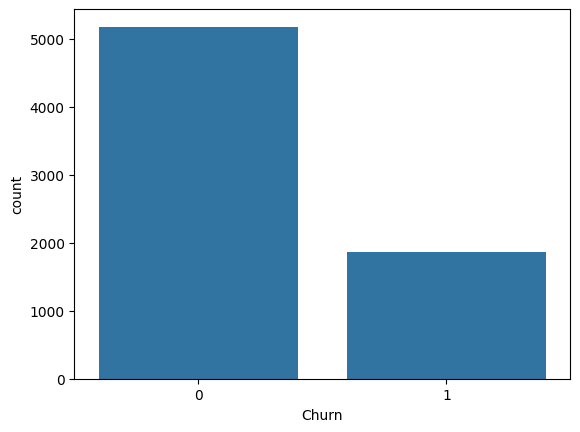

In [88]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [89]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://binarios.intranet.bb.com.br/artifactory/api/pypi/pypi/simple, http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple


In [90]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [91]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [92]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


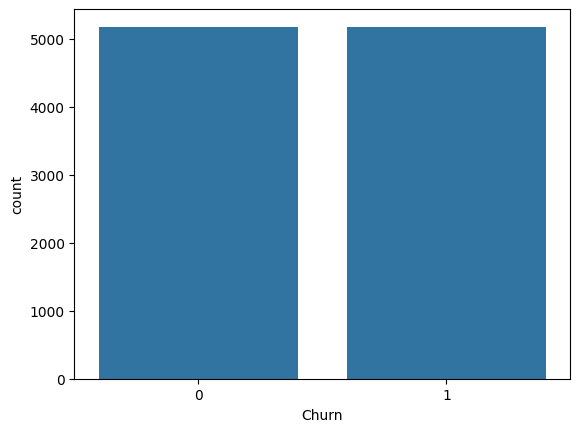

In [93]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [94]:
dados_final.Churn.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

# Aula 2 - Método baseado na proximidade

## 2.2 - KNN por trás dos panos

In [95]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [96]:
#ymaria = ?

In [97]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [98]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [99]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ]])

In [100]:
X_normalizado[0]


array([ 1.26542767, -0.52756038, -3.06083934,  0.81465673, -0.41350409,
       -1.10771299, -1.32176003, -0.88499468,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.51766965, -0.95816089, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18667256, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30292044, -0.47882211, -0.4360152 ])

In [101]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81465673, -0.41350409,
        -1.14937735, -0.97235319,  1.1299503 , -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51766965, -0.95816089, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18667256, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76750657, -0.47882211,  2.293498  ]])

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [102]:
import numpy as np


In [103]:
a = Xmaria_normalizado
b = X_normalizado[0]




In [104]:
#1 - começamos subtraindo 
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166436,  0.34940684,  2.01494498, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03436608,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72951321]])

In [105]:
#2 - depois realizamos a exponenciação
np.square(a-b)



array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73591848e-03, 1.22085140e-01, 4.06000326e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.45024235e+00]])

In [106]:
#3 - a soma 
np.sum(np.square(a-b))

91.7095420529064

In [107]:
#4 - então tiramos a raiz e temos nossa distância
np.sqrt(91.70603225977928)

9.576326657950807

## 2.3 - Implementando o modelo

In [108]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [109]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

### Treino e teste 

In [110]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [111]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')

In [112]:
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [113]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [114]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

# Aula 3 - Método probabilístico

## 3.1 - Teorema de Naive Bayes 

## 3.2 - Modelo Bernoulli Naive Bayes

## 3.3 - Treinamento e teste

In [115]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [116]:
#criamos o modelo
bnb = BernoulliNB(binarize=0.44)

In [117]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
np.median(X_treino)

-0.4461759755508453

In [118]:
X_treino


array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ]])

In [119]:
y_treino


4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [120]:
#treinar o modelo
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=0.44)

In [121]:
#testar o modelo
predito_BNb = bnb.predict(X_teste)

In [122]:
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

# Aula 4 - Método Simbólico

## 4.1 - O que é árvore de decisão?

## 4.3 - Implementando o modelo

In [123]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [124]:
#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [125]:
#treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [126]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.02070208, 0.01349543, 0.0068095 , 0.02090223, 0.01492519,
       0.16169616, 0.22580293, 0.00889189, 0.00344576, 0.01122927,
       0.0019815 , 0.03128648, 0.00065123, 0.01251806, 0.        ,
       0.0145619 , 0.00784856, 0.        , 0.0097366 , 0.01125643,
       0.        , 0.00735279, 0.0143391 , 0.00396098, 0.01956256,
       0.00262135, 0.        , 0.00203258, 0.0082409 , 0.0003825 ,
       0.01088157, 0.03622159, 0.16358635, 0.07445054, 0.01664409,
       0.02129506, 0.02179021, 0.01889663])

In [127]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [128]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

# 5 - Validação dos modelos

## 5.1 - Matriz de confusão

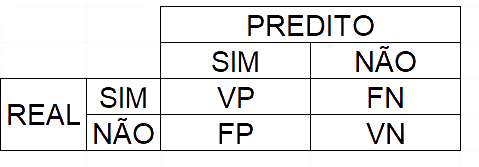

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 251 1285]]


In [131]:
print(confusion_matrix(y_teste, predito_BNb))

[[1085  484]
 [ 238 1298]]


In [132]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1250  319]
 [ 279 1257]]


## 5.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
#modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8135265700483092


In [135]:
#modelo Bernoulli de naive bayes
print(accuracy_score(y_teste, predito_BNb))

0.7674718196457327


In [136]:
#modelo árvore de decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8074074074074075


## 5.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [137]:
from sklearn.metrics import precision_score

In [138]:
#modelo KNN
print(precision_score(y_teste, predito_knn))

0.796652200867948


In [139]:
#modelo Bernoulli de naive bayes
print(precision_score(y_teste, predito_BNb))

0.7283950617283951


In [140]:
#modelo árvore de decisão
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7975888324873096


## 5.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [141]:
from sklearn.metrics import recall_score

In [142]:
#modelo KNN
print(recall_score(y_teste, predito_knn))

0.8365885416666666


In [143]:
#modelo Bernoulli de naive bayes
print(recall_score(y_teste, predito_BNb))

0.8450520833333334


In [144]:
#modelo árvore de decisão
print(recall_score(y_teste, predito_ArvoreDecisao))

0.818359375


# Calculando métricas
Exercicio 10

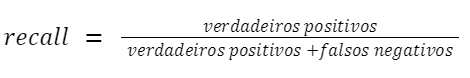

In [145]:
predito = [0,0,0,0,1,1,1,1,0,1,0,1]
real = [1,1,0,0,1,1,1,0,1,0,1,0]

recall = recall_score(real, predito)
recall

0.42857142857142855

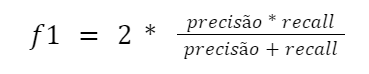

In [146]:
precisao = precision_score(real, predito)
precisao

0.5

In [147]:
f1 = 2 *((precisao * recall )/(precisao + recall))
f1

0.4615384615384615

## 5.5 - Escolhendo o melhor modelo

In [148]:
#Exemplo - análise das precisões calculadas anteriormente
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_BNb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.796652200867948
Modelo Bernoulli de Naive Bayes:  0.7283950617283951
Modelo Árvore de Decisão:  0.7975888324873096
